This is the first file in my attempt to create a tic-tac-toe five in a row game and have the computer play it.

TODO:
* Create data stucture that containsa game
* Plot a grid on which the game can be played
* Create the ability to play moves

## Drawing the Board

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Elements of a board:
1. Its size
1. The lines
1. The shaded squares
1. A lack of axes and such

In [2]:
width = 11 #[squares]. width of grid. Should be odd
height = 11 #[squares] height of grid. should be odd
gridcolor = 'black'
try:
    assert width%2==1 and height%2==1
except:
    display("The inputs for width and height must be odd integers")

Text(2.55, -4.3, '47')

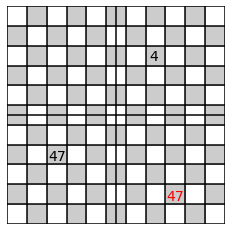

In [3]:
fig, ax = plt.subplots()
# Control size of figure
ax.set_xlim(-width/2, width/2)
ax.set_ylim(-height/2, height/2)
ax.set_aspect(1)

## Hide original Axes and labels
for side in['top','right','left','bottom']:
    ax.spines[side].set_visible(False)
ax.tick_params(axis='both',
               which='both',
               bottom=False,
               top=False,
               labelbottom=False,
               labelleft=False,
               left=False,
               right=False)
## Drawing the grid lines
for x in np.arange(-width/2,width/2+1):
    ax.axvline(x, color = gridcolor)
for y in np.arange(-height/2,height/2+1):
    ax.axhline(y, color = gridcolor)

## Drawing the grid squares
for x in np.arange(-width/2, width/2):
    for y in np.arange(-height/2, height/2):
        if (np.abs(x+0.5)+np.abs(y+0.5))%2==1:
            rect = plt.Rectangle((x,y),1,1, alpha=0.2, color = 'black')
            ax.add_artist(rect)
            
## Draw axes for reference
ax.axhline(0,color = gridcolor)
ax.axvline(0,color= gridcolor)
            
## Draw a number in the specified square
x,y = (2,3)
x_1dcomp = -0.3
y_1dcomp = -0.2
# Draw a one-digit number
ax.text(x+x_1dcomp,y+y_1dcomp, '4', color = 'black', size=14)
# Draw a two-digit number
x,y = -3,-2
x_2dcomp = -0.4
y_2dcomp = -0.3
ax.text(x+x_2dcomp,y+y_2dcomp, '47', color = 'black', size=14,alpha=1)
# Draw a red two-digit number
x,y = 3,-4
x_2dcomp = -0.45
y_2dcomp = -0.3
ax.text(x+x_2dcomp,y+y_2dcomp, '47', color = 'red', size=14,alpha=1)

## Storing a game's data

A game is simply a series of moves, and each move consists of:
1. The location of the move
1. The number played
1. The color of the player for any particular move.
Though the color of each move alternates, and the number played can be calculated from the previous, we will not put such limitations on the game data itself, allowing us to generate arbitrary game situations.
Mostly out of a love of DataFrames, that is what I will use to store game data.

In [4]:
class game():
    df_template = pd.DataFrame({'marker':[],
                               'x_loc':[],
                               'y_loc':[],
                               'player':[]})
    def __init__(self):
        self.df = self.df_template.copy(deep=True)
    def manual_move(self,mark, x_loc, y_loc, player):
        new_row= self.df_template.copy(deep=True)
        new_row.marker = [int(mark)]
        new_row.x_loc = [int(x_loc)]
        new_row.y_loc = [int(y_loc)]
        new_row.player = [player]
        print(new_row)
        self.df = pd.concat([self.df,new_row])
        

In [5]:
g = game()

In [6]:
g.df

,marker,x_loc,y_loc,player


In [7]:
g.manual_move(1,0,0,'black')

   marker  x_loc  y_loc player
0       1      0      0  black


In [8]:
g.df

,marker,x_loc,y_loc,player
0,1.0,0.0,0.0,black


In [9]:
df = game.df_template.copy(deep=True)

In [10]:
df


,marker,x_loc,y_loc,player
